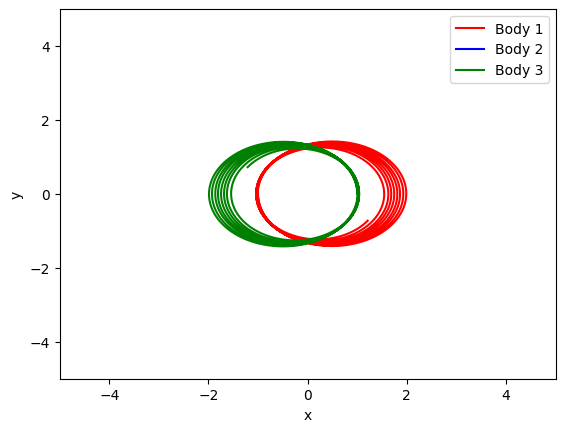

10000

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def three_body(t, Y, G, masses):
    x1, y1, x2, y2, x3, y3, x1_dot, y1_dot, x2_dot, y2_dot, x3_dot, y3_dot = Y

    r12 = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
    r13 = np.sqrt((x1 - x3)**2 + (y1 - y3)**2)
    r23 = np.sqrt((x2 - x3)**2 + (y2 - y3)**2)

    dxdt= [x1_dot, y1_dot,
           x2_dot, y2_dot,
           x3_dot, y3_dot,
           G * masses[1] * (x2 - x1) / r12**3 + G * masses[2] * (x3 - x1) / r13**3,
           G * masses[1] * (y2 - y1) / r12**3 + G * masses[2] * (y3 - y1) / r13**3,
           G * masses[0] * (x1 - x2) / r12**3 + G * masses[2] * (x3 - x2) / r23**3,
           G * masses[0] * (y1 - y2) / r12**3 + G * masses[2] * (y3 - y2) / r23**3,
           G * masses[0] * (x1 - x3) / r13**3 + G * masses[1] * (x2 - x3) / r23**3,
           G * masses[0] * (y1 - y3) / r13**3 + G * masses[1] * (y2 - y3) / r23**3]

    return dxdt

G = 1.0  # Gravitational constant
masses = [1.0, 0.50, 1.0]  # Masses, m1, m2, m3
initial_conditions = [-1.0, 0.0, 0.0, 0.0, +1.0, 0.0,   0.0, -1.0, 0.0, 0.0, 0.0, 1.0]  # stable figure eight
#initial_conditions = [-1.0, 0.0, 0.0, 0.0, +1.0, 0.0, -0.3471128135672417, -0.532726851767674, 0.0, 0.0, 0.3471128135672417, 0.532726851767674]
#initial_conditions = [-1.0, 0.0, 0.0, 0.0, +1.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0]
time = np.linspace(0, 100, 10000)
tspan = (0.0,100.0)

solution = solve_ivp(three_body, tspan, initial_conditions, args=(G, masses), t_eval=time)

plt.plot(solution.y[0], solution.y[1],"r-", label='Body 1')
plt.plot(solution.y[2], solution.y[3],"b-", label='Body 2')
plt.plot(solution.y[4], solution.y[5],"g-", label='Body 3')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-5.,5.)
plt.ylim(-5.,5.)
plt.legend()
plt.show()
np.size(solution.t)